## 3.6 数据规范化

**基础知识**

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
iris = datasets.load_iris()
iris_std = StandardScaler().fit_transform(iris.data)    # ①

In [2]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
iris_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
import numpy as np
np.mean(iris_std, axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [5]:
np.std(iris_std, axis=0)

array([1., 1., 1., 1.])

In [6]:
from sklearn.preprocessing import MinMaxScaler
iris_mm = MinMaxScaler().fit_transform(iris.data)    # ②
iris_mm[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [7]:
np.mean(iris_mm, axis=0)

array([0.4287037 , 0.44055556, 0.46745763, 0.45805556])

In [8]:
np.std(iris_mm, axis=0)

array([0.22925036, 0.18100457, 0.29820408, 0.31653859])

In [9]:
import pandas as pd
X = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
X.sample(10)

,x1,x2
324,18.458756,30.276974
528,19.682128,29.103594
61,20.342401,30.104010
165,19.840890,29.758539
963,20.613072,30.282810
903,21.132488,29.876394
629,18.599309,30.313533
582,20.344213,28.195743
441,18.997640,30.648308
469,19.557120,28.132125


In [10]:
np.std(X, axis=0)

x1    3.127149
x2    3.217513
dtype: float64

In [11]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robust = RobustScaler()
robust_scaled = robust.fit_transform(X)
robust_scaled = pd.DataFrame(robust_scaled, columns=['x1', 'x2'])

minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(X)
minmax_scaled = pd.DataFrame(minmax_scaled, columns=['x1', 'x2'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


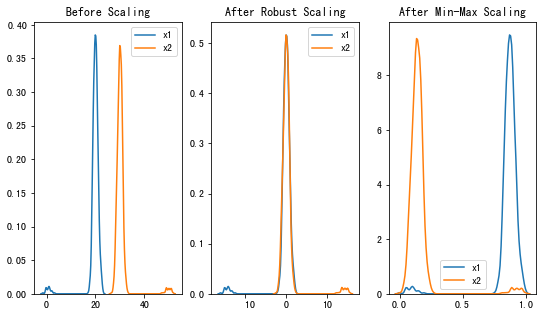

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X['x1'], ax=ax1)
sns.kdeplot(X['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled['x1'], ax=ax2)
sns.kdeplot(robust_scaled['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled['x1'], ax=ax3)
sns.kdeplot(minmax_scaled['x2'], ax=ax3)

In [13]:
from sklearn.preprocessing import Normalizer 
norma = Normalizer()    # ③
norma.fit_transform([[3, 4]])

array([[0.6, 0.8]])

In [14]:
norma1 = Normalizer(norm='l1')
norma1.fit_transform([[3, 4]])

array([[0.42857143, 0.57142857]])

In [15]:
norma_max = Normalizer(norm='max')
norma_max.fit_transform([[3, 4]])

array([[0.75, 1.  ]])

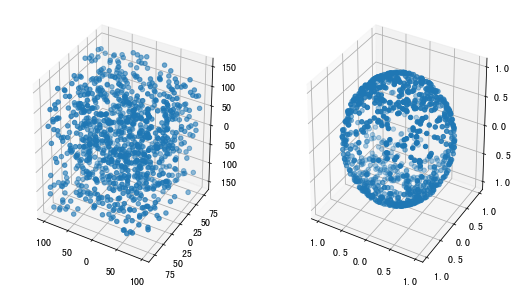

In [16]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

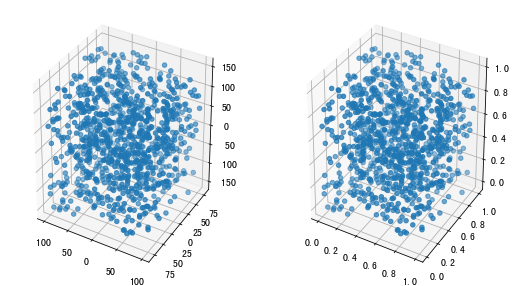

In [17]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

**项目案例**

In [18]:
import pandas as pd
import numpy as np
path = "/Users/qiwsir/Documents/Codes/DataSet"
df = pd.read_csv(path + "/winemag/wine_data.csv",usecols=[0,1,2])
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df[['Alcohol', 'Malic_acid']])

mm_scaler = MinMaxScaler()
df_mm = mm_scaler.fit_transform(df[['Alcohol', 'Malic_acid']])

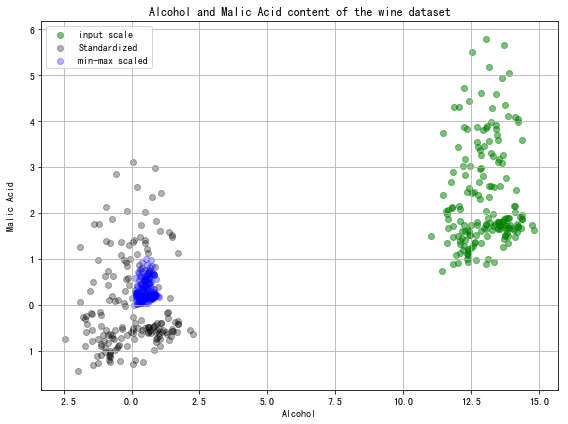

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_acid'],
            color='green', label='input scale', alpha=0.5)    # ③

plt.scatter(df_std[:,0], df_std[:,1], color='black',
            label='Standardized', alpha=0.3)    # ④

plt.scatter(df_mm[:,0], df_mm[:,1],
            color='blue', label='min-max scaled', alpha=0.3)    # ⑤

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

**动手练习**

In [21]:
df = pd.read_csv(path + "/body-information/500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
df_std = StandardScaler().fit_transform(df[['Height', 'Weight']])
df_mm = MinMaxScaler().fit_transform(df[['Height', 'Weight']])
df_nor = Normalizer().fit_transform(df[['Height', 'Weight']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
